# Problema 1: Geisers de Yellowstone

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

df = pd.read_table('../datasets/geyser.dat', sep="\s+")
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,272.0,136.500000,78.663842,1.0,68.75000,136.5,204.25000,272.0
eruptions,272.0,3.487783,1.141371,1.6,2.16275,4.0,4.45425,5.1
waiting,272.0,70.897059,13.594974,43.0,58.00000,76.0,82.00000,96.0


## Exploración de los datos

### Atributo eruptions
Tiempo de la erupción en minutos
Tipo: Numérico

In [30]:
df.eruptions.describe()

count    272.000000
mean       3.487783
std        1.141371
min        1.600000
25%        2.162750
50%        4.000000
75%        4.454250
max        5.100000
Name: eruptions, dtype: float64

In [31]:
df.eruptions.median()

4.0

<AxesSubplot:xlabel='eruptions', ylabel='Count'>

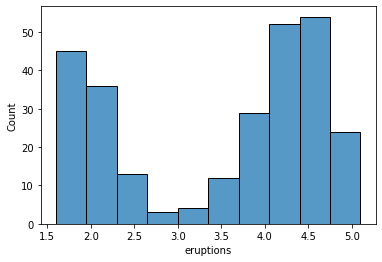

In [32]:
sns.histplot(data=df,x='eruptions')

<AxesSubplot:xlabel='eruptions'>

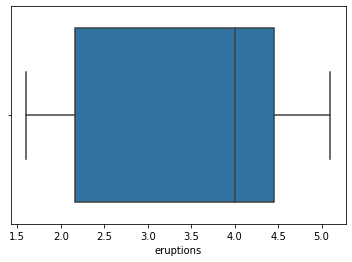

In [33]:
sns.boxplot(data=df, x='eruptions')

### Atributo waiting
Tiempo entre dos erupciones en minutos


fuente: https://www.rdocumentation.org/packages/mixAK/versions/5.3/topics/Faithful

In [34]:
df.waiting.describe()

count    272.000000
mean      70.897059
std       13.594974
min       43.000000
25%       58.000000
50%       76.000000
75%       82.000000
max       96.000000
Name: waiting, dtype: float64

In [35]:
df.waiting.median()

76.0

<AxesSubplot:xlabel='waiting', ylabel='Count'>

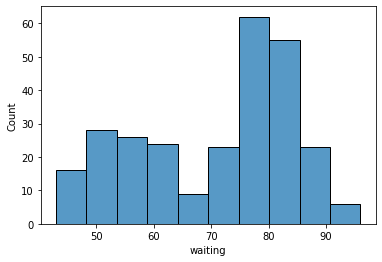

In [36]:
sns.histplot(data=df,x='waiting')

<AxesSubplot:xlabel='waiting'>

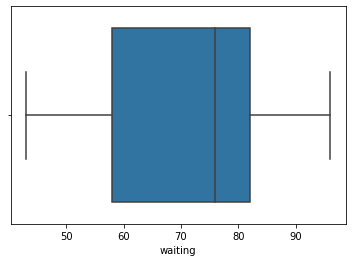

In [37]:
sns.boxplot(data=df, x='waiting')

### Buscamos relaciones enrte las variables

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

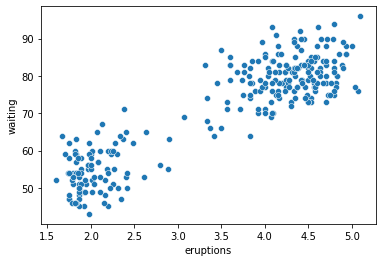

In [38]:
sns.scatterplot(data=df, x='eruptions',y='waiting')

Se puede observar que existe una clara distinción en dos grupos

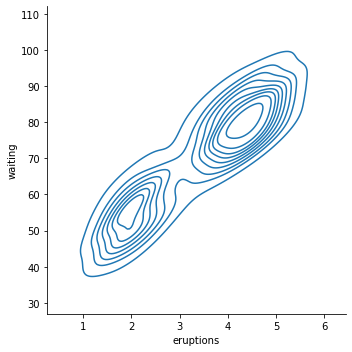

In [39]:
sns.displot(data=df, x="eruptions", y="waiting", kind="kde")

## Modelado

### Kmeans

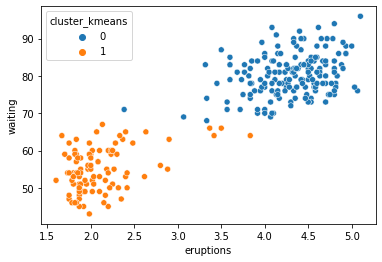

In [48]:
from sklearn.cluster import KMeans

X = df[['eruptions', 'waiting']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['cluster_kmeans'] = kmeans.predict(X)

sns.scatterplot(data=df, x='eruptions',y='waiting', hue='cluster_kmeans')

### Dbscan

Primer hacemos un dbscan "común" para comparar resultados con kmeans

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

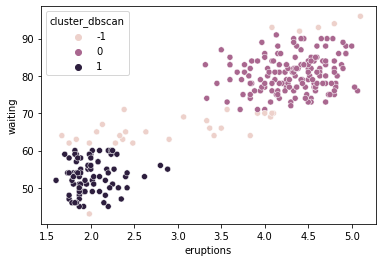

In [41]:
from sklearn.cluster import DBSCAN

X = df[['eruptions', 'waiting']]
dbscan = DBSCAN(eps=1.2, min_samples=10, metric='euclidean').fit(X)
df['cluster_dbscan'] = dbscan.fit_predict(X)
sns.scatterplot(data=df, x='eruptions',y='waiting', hue='cluster_dbscan')

Como segunda opción, podemos usar db scan para eliminar el ruido. De esta manera nos queda un gráfico mas limpio

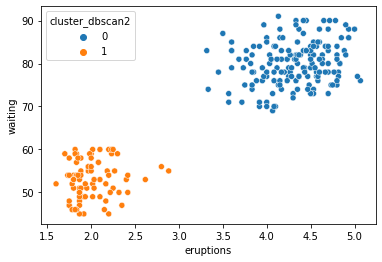

In [42]:
X = df[['eruptions', 'waiting']]
dbscan = DBSCAN(eps=1.1, min_samples=9, metric='euclidean').fit(X)
df['cluster_dbscan2'] = dbscan.fit_predict(X)
df2 = df.loc[df['cluster_dbscan2'] != -1]
sns.scatterplot(data=df2, x='eruptions',y='waiting', hue='cluster_dbscan2')

### Optics

<AxesSubplot:xlabel='eruptions', ylabel='waiting'>

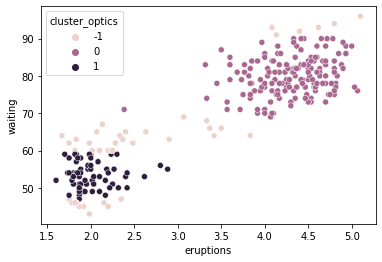

In [43]:
from sklearn.cluster import OPTICS
X = df[['eruptions', 'waiting']]
optics = OPTICS(max_eps=4, min_samples=40).fit(X)
df['cluster_optics'] = optics.fit_predict(X)
sns.scatterplot(data=df, x='eruptions',y='waiting', hue='cluster_optics')

Ploteamos los clusters obtenidos quitando el ruido

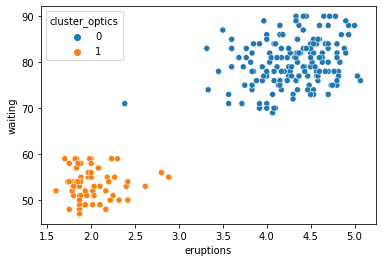

In [49]:
df2 = df.loc[df['cluster_optics'] != -1]
sns.scatterplot(data=df2, x='eruptions',y='waiting', hue='cluster_optics')

# Problema 2: Problemas soporte tecnico
Un equipo de soporte técnico maneja diariamente varios tipos de problemas distintos. Algunos problemas son más frecuentes y fáciles de resolver, mientras que otros son complejos y requieren de varias llamadas telefónicas y visitas del técnico hasta que estén resueltos.
Con la finalidad de optimizar el tiempo de los técnicos, la empresa desea armar equipos de trabajo a los cuales se le asignarán un conjunto de problemas de los cuales ocuparse.
La empresa desea saber cuántos equipos de trabajo conformar y qué problemas va a ser asignado a cada equipo de trabajo, intentando que dichos problemas sean similares entre si, de forma tal que se pueda seleccionar los recursos humanos que mejor se ajusten a la resolución de los mismos.
Se dispone de una base de datos con todos los problemas que se tratan, con información estadística sobre los mismos (issues.csv) .

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('../datasets/issues.csv')
df

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,Admin Password Lost,45,2.3,54,0.15,0.00
1,Windows Reboots automatically,47,3.1,132,0.30,0.03
2,System not coming up after reboot,12,4.0,154,0.02,0.05
3,Slow system,165,1.2,32,0.03,0.00
4,Internet Connectivity loss,321,1.0,5,0.21,0.00
5,New Installation hangs,22,3.3,140,0.14,0.01
6,Intermittent Blank Screen,23,4.3,143,0.21,0.06
7,Too many popups in Browser,230,1.3,23,0.02,0.00
8,Cannot find printer,193,1.2,33,0.03,0.00
9,Missing peripheral driver,24,2.8,180,0.04,0.00


## Exploración de datos

### Atributo PROBLEM_TYPE

In [18]:
df.PROBLEM_TYPE

0                   Admin Password Lost
1         Windows Reboots automatically
2     System not coming up after reboot
3                           Slow system
4            Internet Connectivity loss
5                New Installation hangs
6             Intermittent Blank Screen
7            Too many popups in Browser
8                   Cannot find printer
9             Missing peripheral driver
10               Cannot detect keyboard
11                  Cannot detect mouse
12          Head phone jack not working
13                       DVD read error
14         Cannot recover using restore
15                 WIFI not functioning
16                  Laptop not charging
17        Laptop loses charge very fast
18                 Dark areas on screen
19               anti-virus not working
Name: PROBLEM_TYPE, dtype: object

In [19]:
df.PROBLEM_TYPE.describe()

count                                    20
unique                                   20
top       System not coming up after reboot
freq                                      1
Name: PROBLEM_TYPE, dtype: object

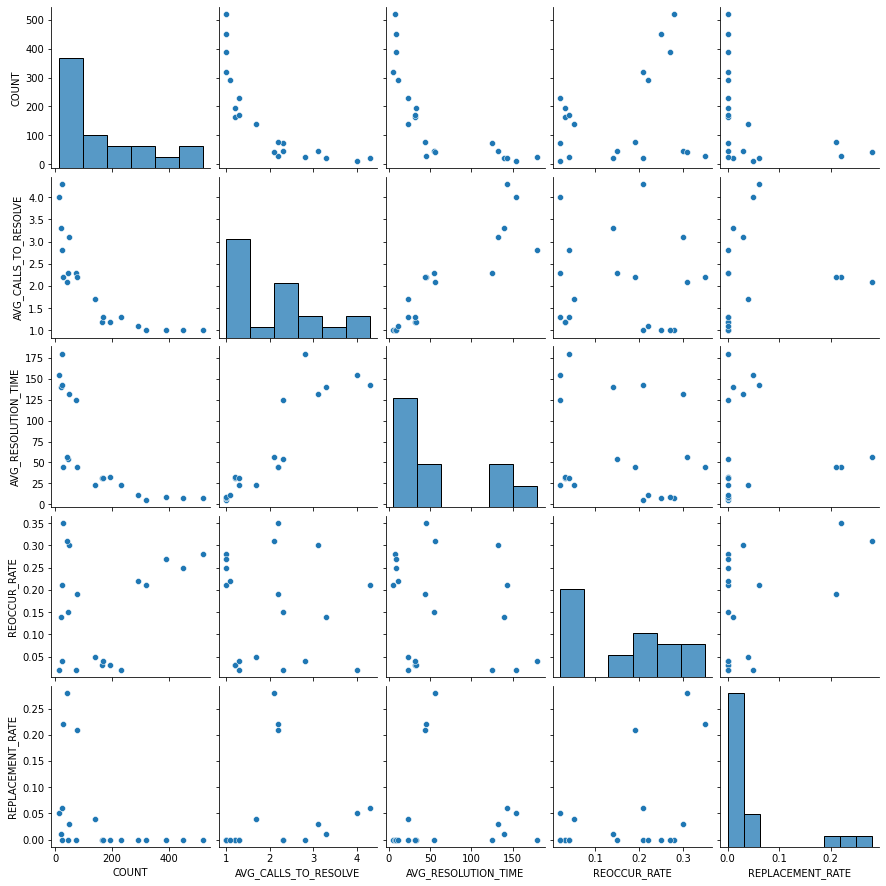

In [63]:
sns.pairplot(data=df)

### Atributo Count

In [21]:
df.COUNT.describe()

count     20.000000
mean     163.200000
std      156.483596
min       12.000000
25%       39.500000
50%      109.000000
75%      245.000000
max      520.000000
Name: COUNT, dtype: float64

In [74]:
plot = px.bar(df, x="PROBLEM_TYPE", y="COUNT",  hover_data=df.columns)
plot.update_layout(xaxis={'categoryorder':'total descending'})

## Buscando patrones

In [60]:
px.histogram(df, x="PROBLEM_TYPE", y="REPLACEMENT_RATE",  hover_data=df.columns)

<AxesSubplot:xlabel='REPLACEMENT_RATE', ylabel='AVG_CALLS_TO_RESOLVE'>

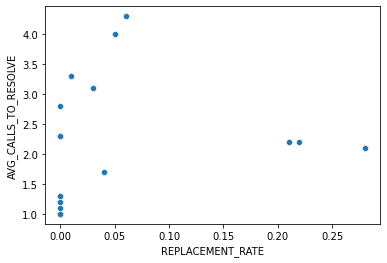

In [67]:
sns.scatterplot(data=df, x="REPLACEMENT_RATE", y="AVG_CALLS_TO_RESOLVE")

<AxesSubplot:xlabel='AVG_CALLS_TO_RESOLVE', ylabel='AVG_RESOLUTION_TIME'>

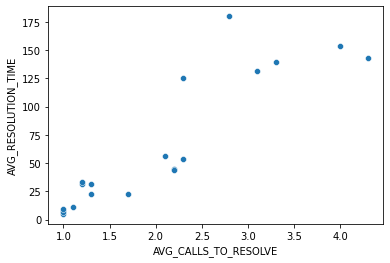

In [78]:
sns.scatterplot(data=df, x="AVG_CALLS_TO_RESOLVE", y="AVG_RESOLUTION_TIME")
# Aca se pueden ver 2 o 3 clusters

<AxesSubplot:xlabel='AVG_RESOLUTION_TIME', ylabel='REPLACEMENT_RATE'>

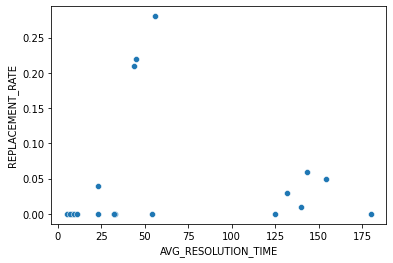

In [81]:
sns.scatterplot(data=df, x="AVG_RESOLUTION_TIME", y="REPLACEMENT_RATE")
## 3 clusters

## Modelado

### Kmeans

In [23]:
df.keys()

Index(['PROBLEM_TYPE', 'COUNT', 'AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME',
       'REOCCUR_RATE', 'REPLACEMENT_RATE'],
      dtype='object')

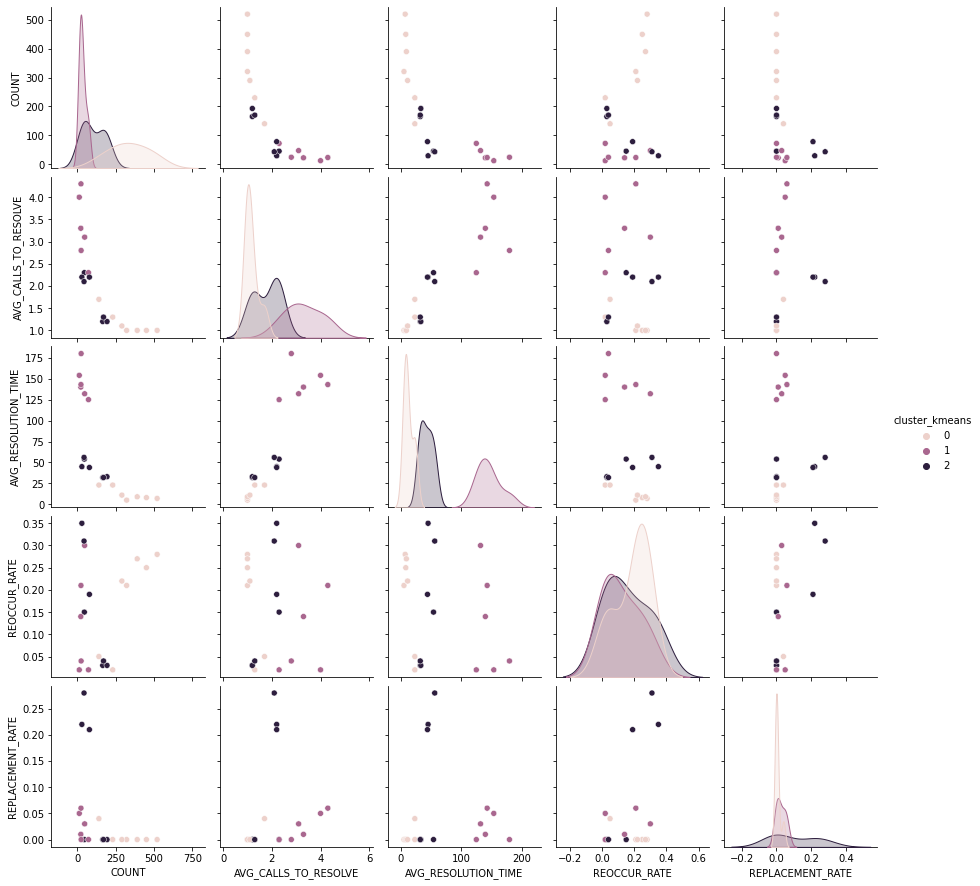

In [85]:
X = df[['AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME', 'REPLACEMENT_RATE']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['cluster_kmeans'] = kmeans.predict(X)

sns.pairplot(data=df, hue="cluster_kmeans")

### Dbscan

/home/leo/Documents/facultad/ted/ted-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/leo/Documents/facultad/ted/ted-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/leo/Documents/facultad/ted/ted-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/leo/Documents/facultad/ted/ted-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/leo/Documents/facultad/ted/ted-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/leo/Documents/facultad/ted/ted-env/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/leo/

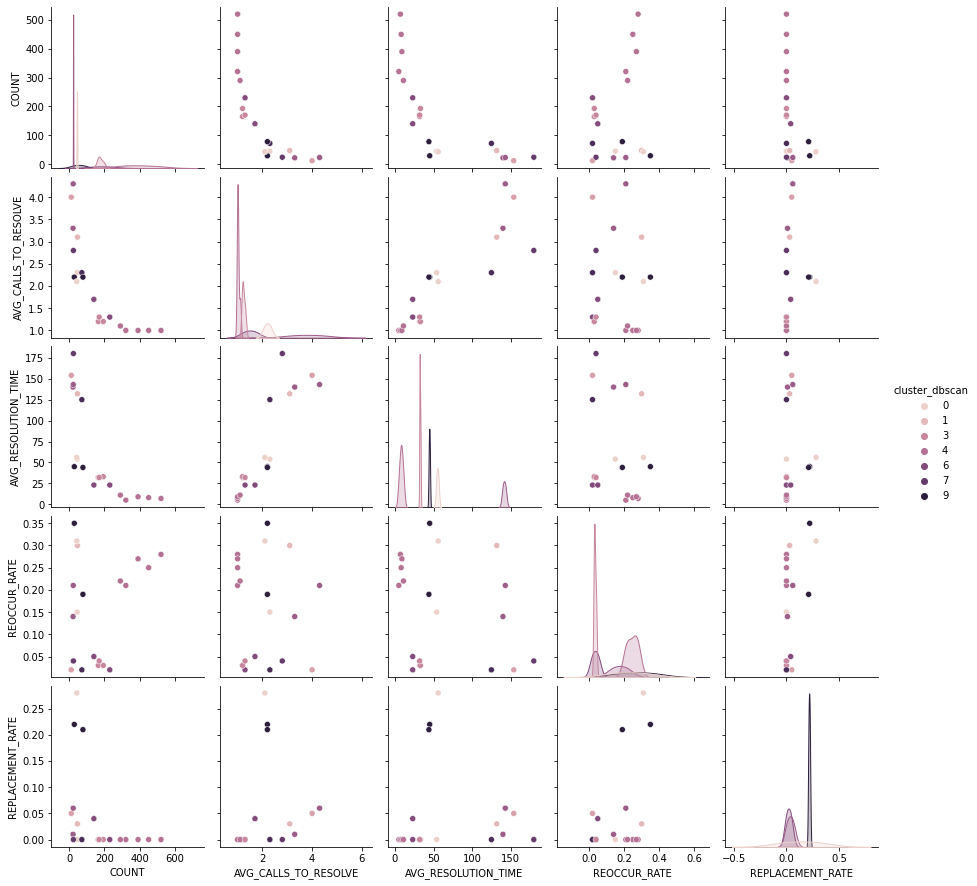

In [89]:
X = df[['AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME', 'REPLACEMENT_RATE']]
dbscan = DBSCAN(eps=5, min_samples=1, metric='euclidean').fit(X)
df['cluster_dbscan'] = dbscan.fit_predict(X)

sns.pairplot(data=df[['PROBLEM_TYPE', 'COUNT', 'AVG_CALLS_TO_RESOLVE', 'AVG_RESOLUTION_TIME',
       'REOCCUR_RATE', 'REPLACEMENT_RATE', 'cluster_dbscan']], hue="cluster_dbscan")